In [1]:
from lynxio import *
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import os
from math import log10
%matplotlib inline

In [4]:
def custom_fft(datapoints, frequency, Fs=30000.0):
    
    #constants 
    fs = Fs
    N = float(len(datapoints))
    
    #fourier transform
    X = np.fft.fftshift(np.fft.fft2(datapoints)) ##fft2: 2d discrete fourier transform
    
    #frequency specification
    dF = fs/N
    print -fs/2, fs/2-dF, dF
    f = np.arange(-fs/2, fs/2-dF, dF)
    
    X =X[:len(f)] #small hack for length adjustment
    
    #plotting the spectrum 
    plt.plot(f,(np.abs(X)/N)/N)
    plt.xlabel('Frequency (in hertz)');
    plt.title('Magnitude Response');
    plt.savefig('Cube.png')
    plt.show()
   
    return max(np.abs(X)/N)

['Starting Recording' 'Stopping Recording']
-15000.0 14999.98342 0.016580008489


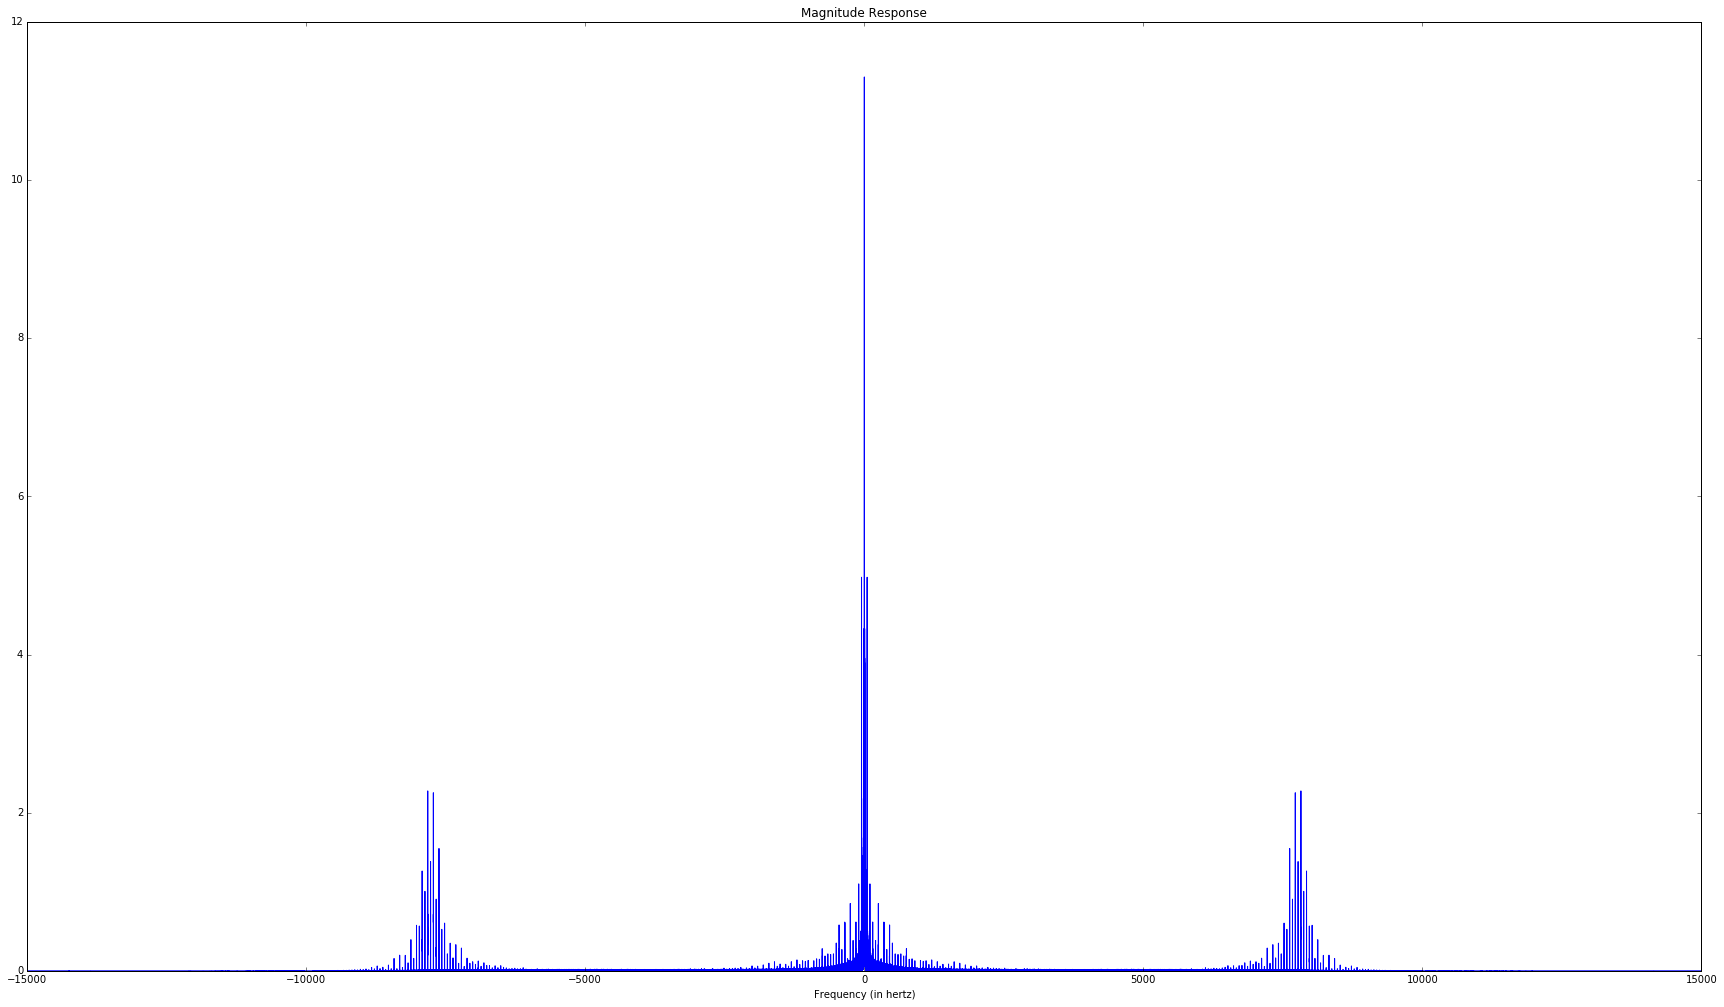

In [5]:
plt.figure(figsize=(30,17))

for filename in os.listdir(os.getcwd()):
    if filename.endswith(".ncs") and filename.startswith("CSC"): 
        channelname = filename.split('.')[0]
        plotname = channelname +'FFT.png'
                
        csc = loadNcs(filename)
        eventTimestamps, eventId, nttl, eventNames = loadNev('Events.nev')
        
        print eventNames
        
        datapoints = fileSplitterUsingEvents(csc, eventTimestamps[0], eventNames[0], eventTimestamps[1], eventNames[1])
        
        #sio.savemat(channelname + '_data.mat', {'datapointsbaseline':datapointsbaseline, 'datapoints1e1hz':datapoints1e1hz, 'datapoints3hz':datapoints3hz, 'datapoints8hz':datapoints8hz, 'datapoints30hz':datapoints30hz, 'datapoints100hz':datapoints100hz, 'datapoints1khz':datapoints1khz, 'datapoints5khz':datapoints5khz, 'datapoints9khz':datapoints9khz, 'datapoints15khz':datapoints15khz})
        
        custom_fft(datapoints, 100)